In [100]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
column_names = [
    "months_as_customer", "age", "policy_number", "policy_bind_date", "policy_state", 
    "policy_csl", "policy_deductable", "policy_annual_premium", "umbrella_limit", 
    "insured_zip", "insured_sex", "insured_education_level", "insured_occupation", 
    "insured_hobbies", "insured_relationship", "capital-gains", "capital-loss", 
    "incident_date", "incident_type", "collision_type", "incident_severity", 
    "authorities_contacted", "incident_state", "incident_city", "incident_location", 
    "incident_hour_of_the_day", "number_of_vehicles_involved", "property_damage", 
    "bodily_injuries", "witnesses", "police_report_available", "total_claim_amount", 
    "injury_claim", "property_claim", "vehicle_claim", "auto_make", "auto_model", 
    "auto_year", "fraud_reported"
]

date_columns = ["policy_bind_date", "incident_date"]

df = pd.read_csv('insurance.csv', header=None, names=column_names, parse_dates=date_columns, dayfirst=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [121]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [122]:
# Check for missing values
print(df.isnull().sum())

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [123]:
df.dropna(subset=['authorities_contacted'], inplace=True)


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           909 non-null    int64         
 1   age                          909 non-null    int64         
 2   policy_number                909 non-null    int64         
 3   policy_bind_date             909 non-null    datetime64[ns]
 4   policy_state                 909 non-null    object        
 5   policy_csl                   909 non-null    object        
 6   policy_deductable            909 non-null    int64         
 7   policy_annual_premium        909 non-null    float64       
 8   umbrella_limit               909 non-null    int64         
 9   insured_zip                  909 non-null    int64         
 10  insured_sex                  909 non-null    object        
 11  insured_education_level      909 non-null    objec

In [141]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
months_as_customer,384
age,46
policy_number,909
policy_bind_date,865
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,903
umbrella_limit,11
insured_zip,904


In [142]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,909.000000,909.000000,909.000000,909,909.000000,909.000000,9.090000e+02,909.000000,909.000000,909.000000,909,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,205.027503,39.040704,546080.628163,2002-02-21 23:18:48.712871296,1131.463146,1256.597712,1.088009e+06,500597.042904,24823.652365,-26923.652365,2015-01-30 05:35:50.495049472,12.062706,1.922992,1.002200,1.481848,57507.645765,8100.891089,8064.906491,41341.848185,2005.125413
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,484.670000,-1.000000e+06,430141.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,337677.000000,1995-09-06 00:00:00,500.000000,1090.030000,0.000000e+00,448190.000000,0.000000,-51800.000000,2015-01-15 00:00:00,6.000000,1.000000,0.000000,0.000000,48060.000000,5260.000000,5340.000000,34370.000000,2000.000000
50%,202.000000,38.000000,532330.000000,2002-04-12 00:00:00,1000.000000,1257.040000,0.000000e+00,466390.000000,0.000000,-22300.000000,2015-01-31 00:00:00,13.000000,1.000000,1.000000,1.000000,60200.000000,7180.000000,7120.000000,43680.000000,2005.000000
75%,278.000000,45.000000,757644.000000,2008-05-16 00:00:00,2000.000000,1415.680000,0.000000e+00,602942.000000,50400.000000,0.000000,2015-02-14 00:00:00,18.000000,3.000000,2.000000,2.000000,72100.000000,11700.000000,11260.000000,51680.000000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000
std,116.003078,9.192118,256283.335105,NaN,611.958791,245.236621,2.278747e+06,71474.927903,27719.509214,28277.509343,NaN,7.005145,1.031769,0.823656,1.111093,22779.061381,4615.021845,4552.940222,16253.292262,6.012991


From the above discription we can observe the following things: The counts of all the columns are same which means there is no missing values in the dataset. The median(50%) value is less than the mean in some of the columns which means the data is little skewed to the right in these columns. In some of the columns it is shown that there is the huge diff between the 75% and max hence there are outliers present in the data.

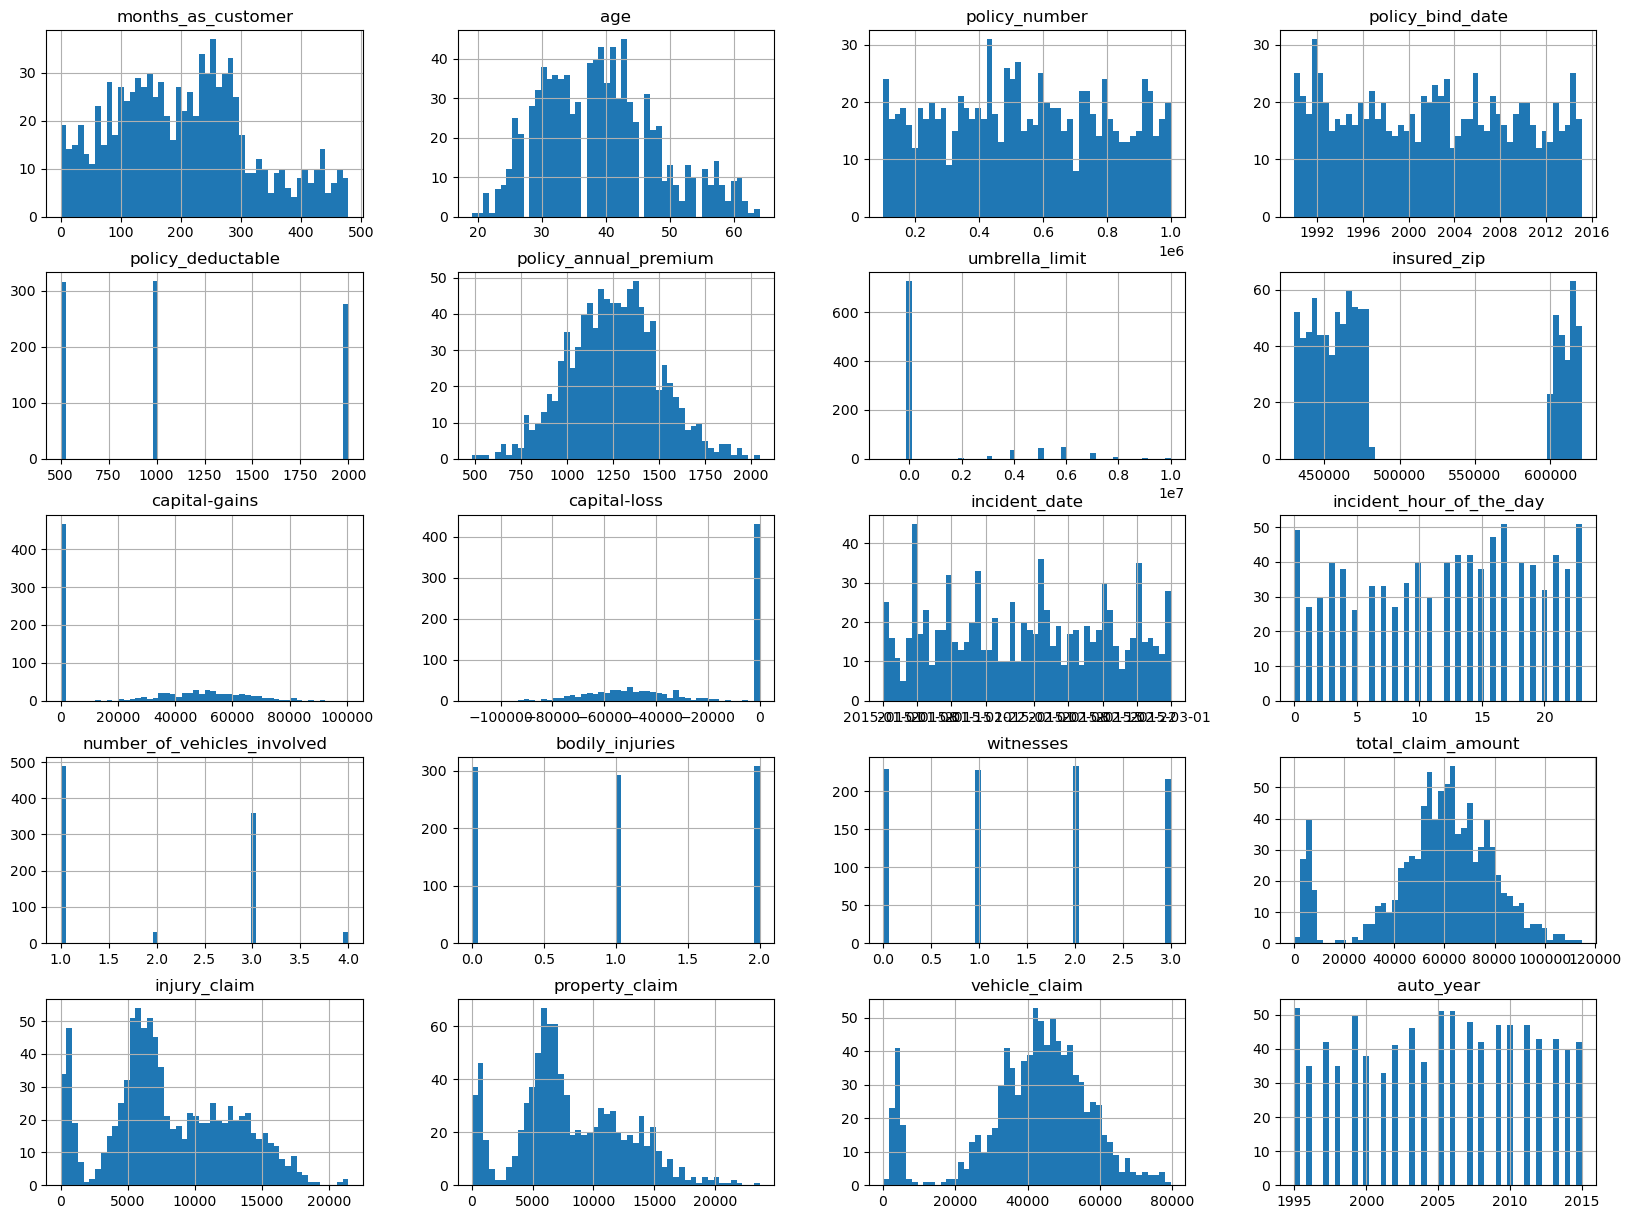

In [143]:
# Histogram of numerical features
df.hist(figsize=(20, 15), bins=50)
plt.show()

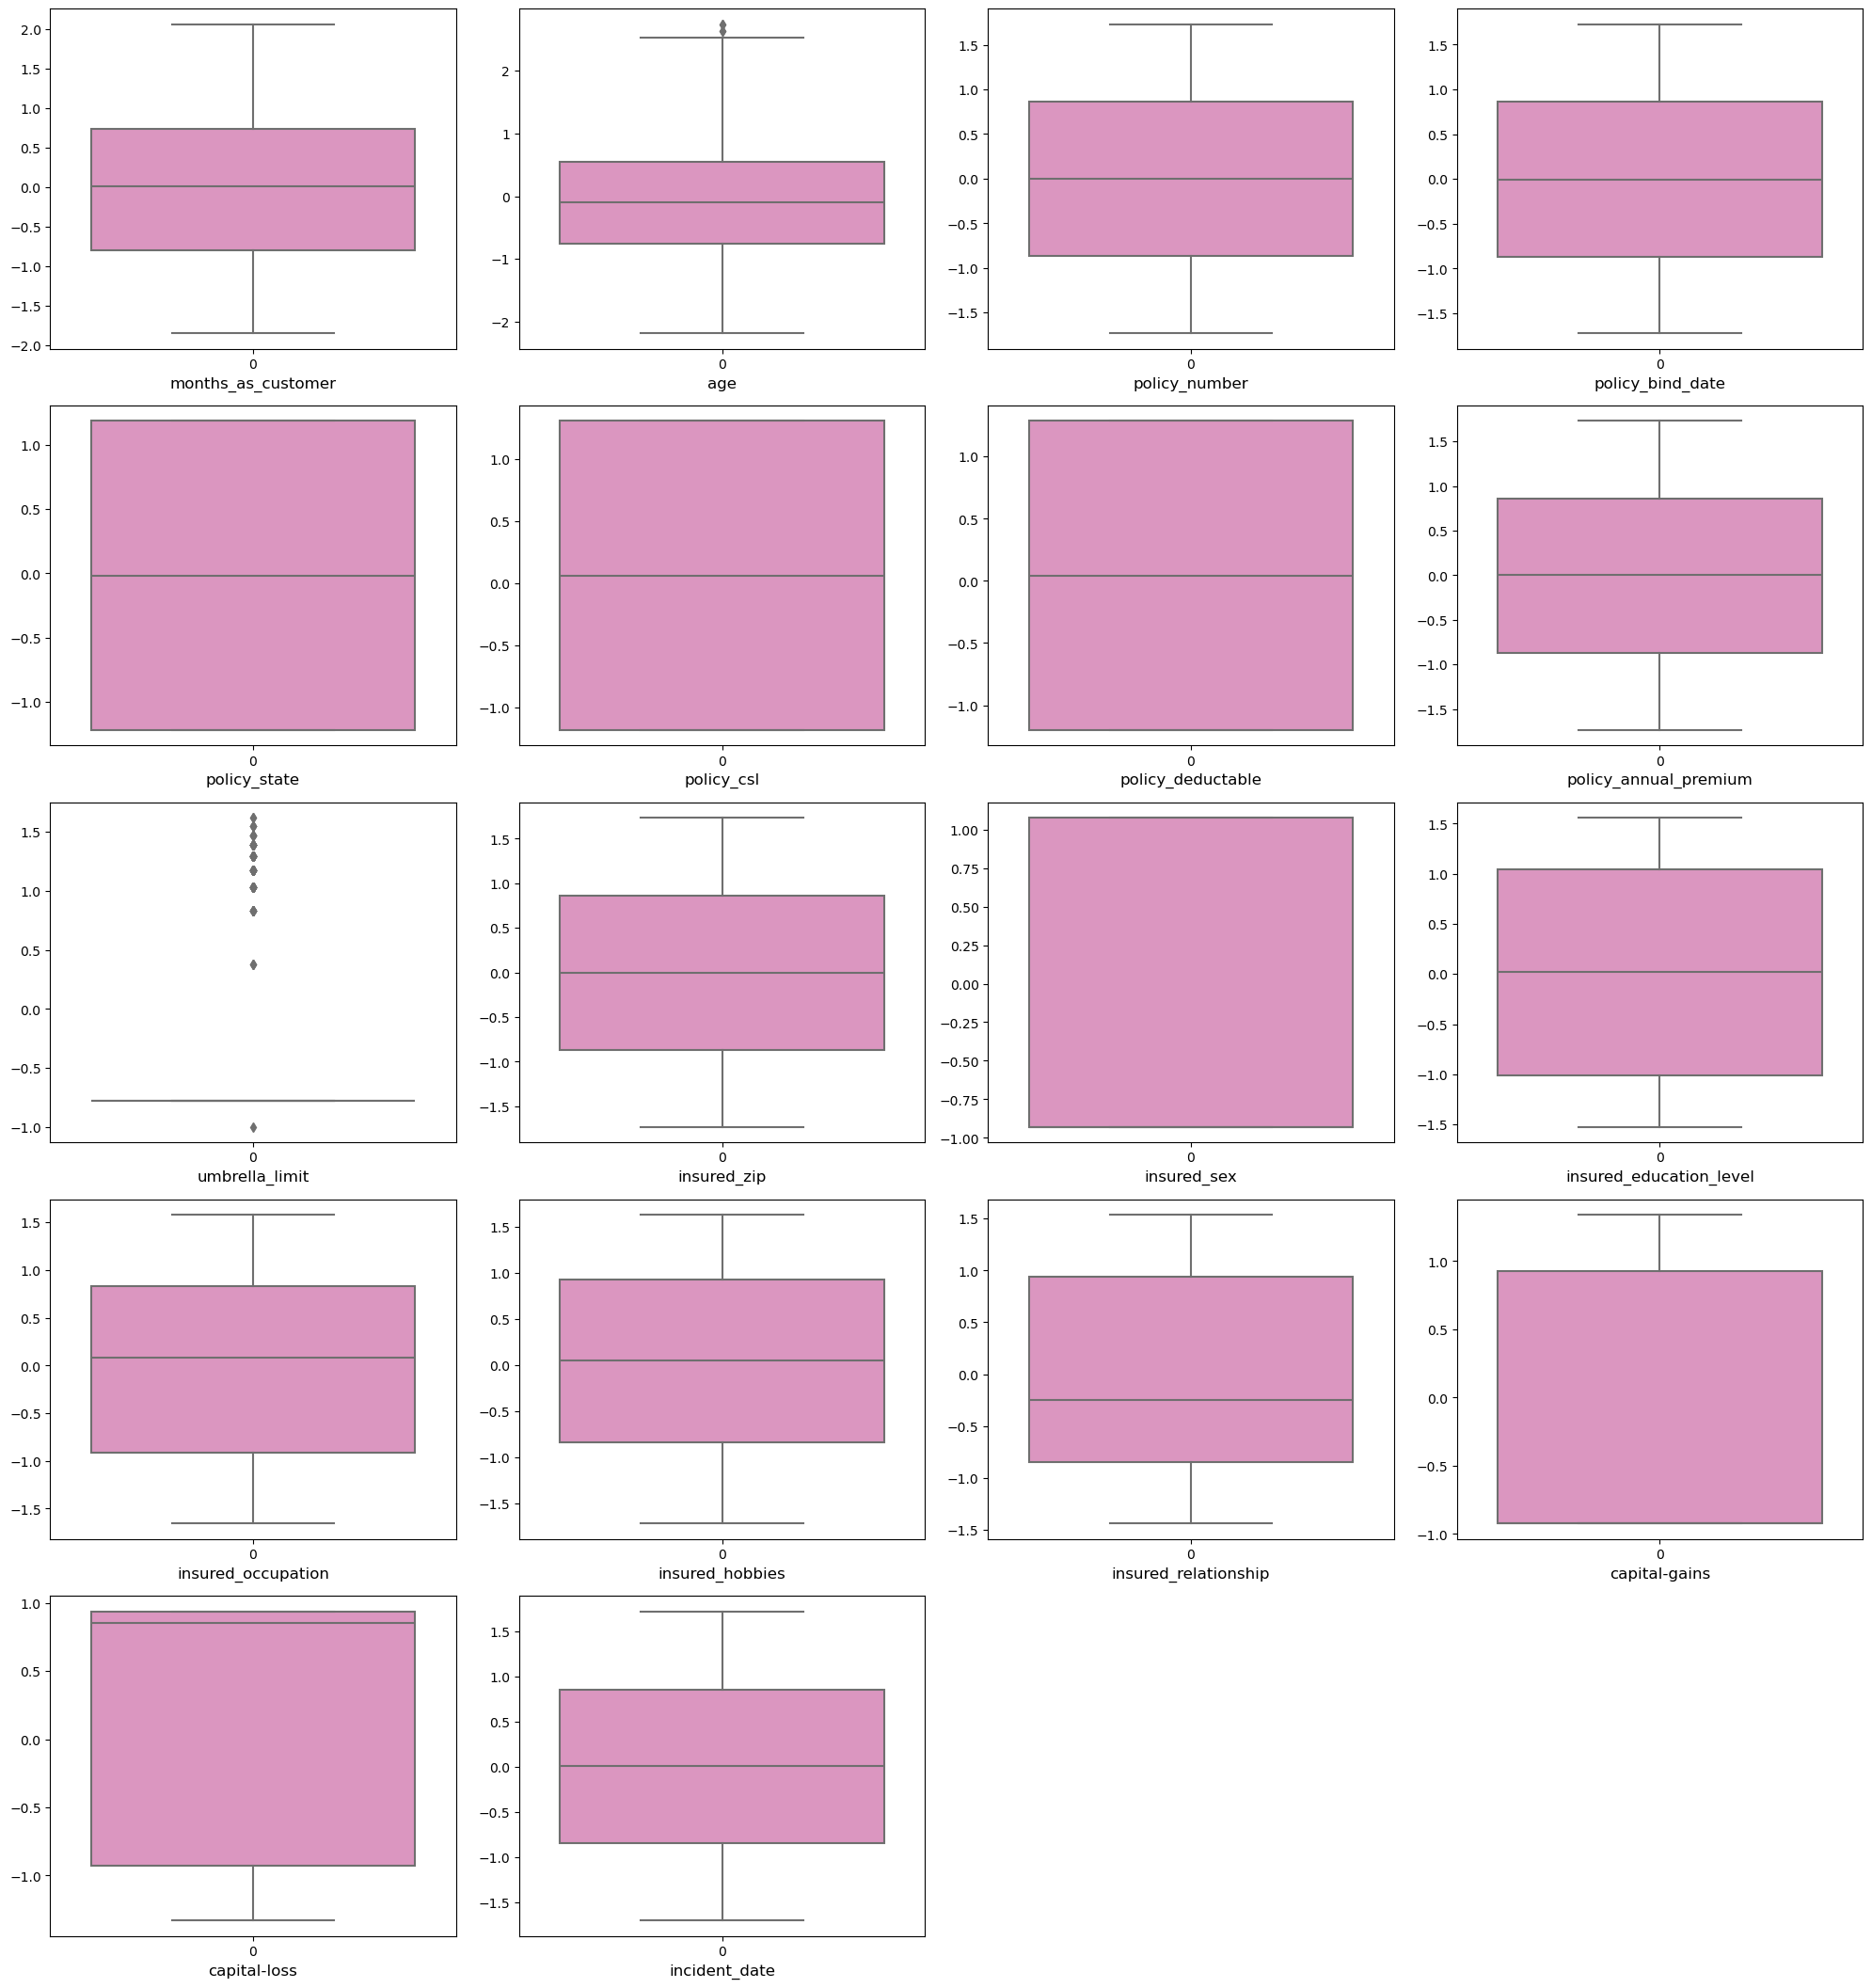

In [146]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.boxplot(df1[column], palette = 'Set2_r')
        plt.xlabel(column, fontsize = 12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber +=1
plt.tight_layout()

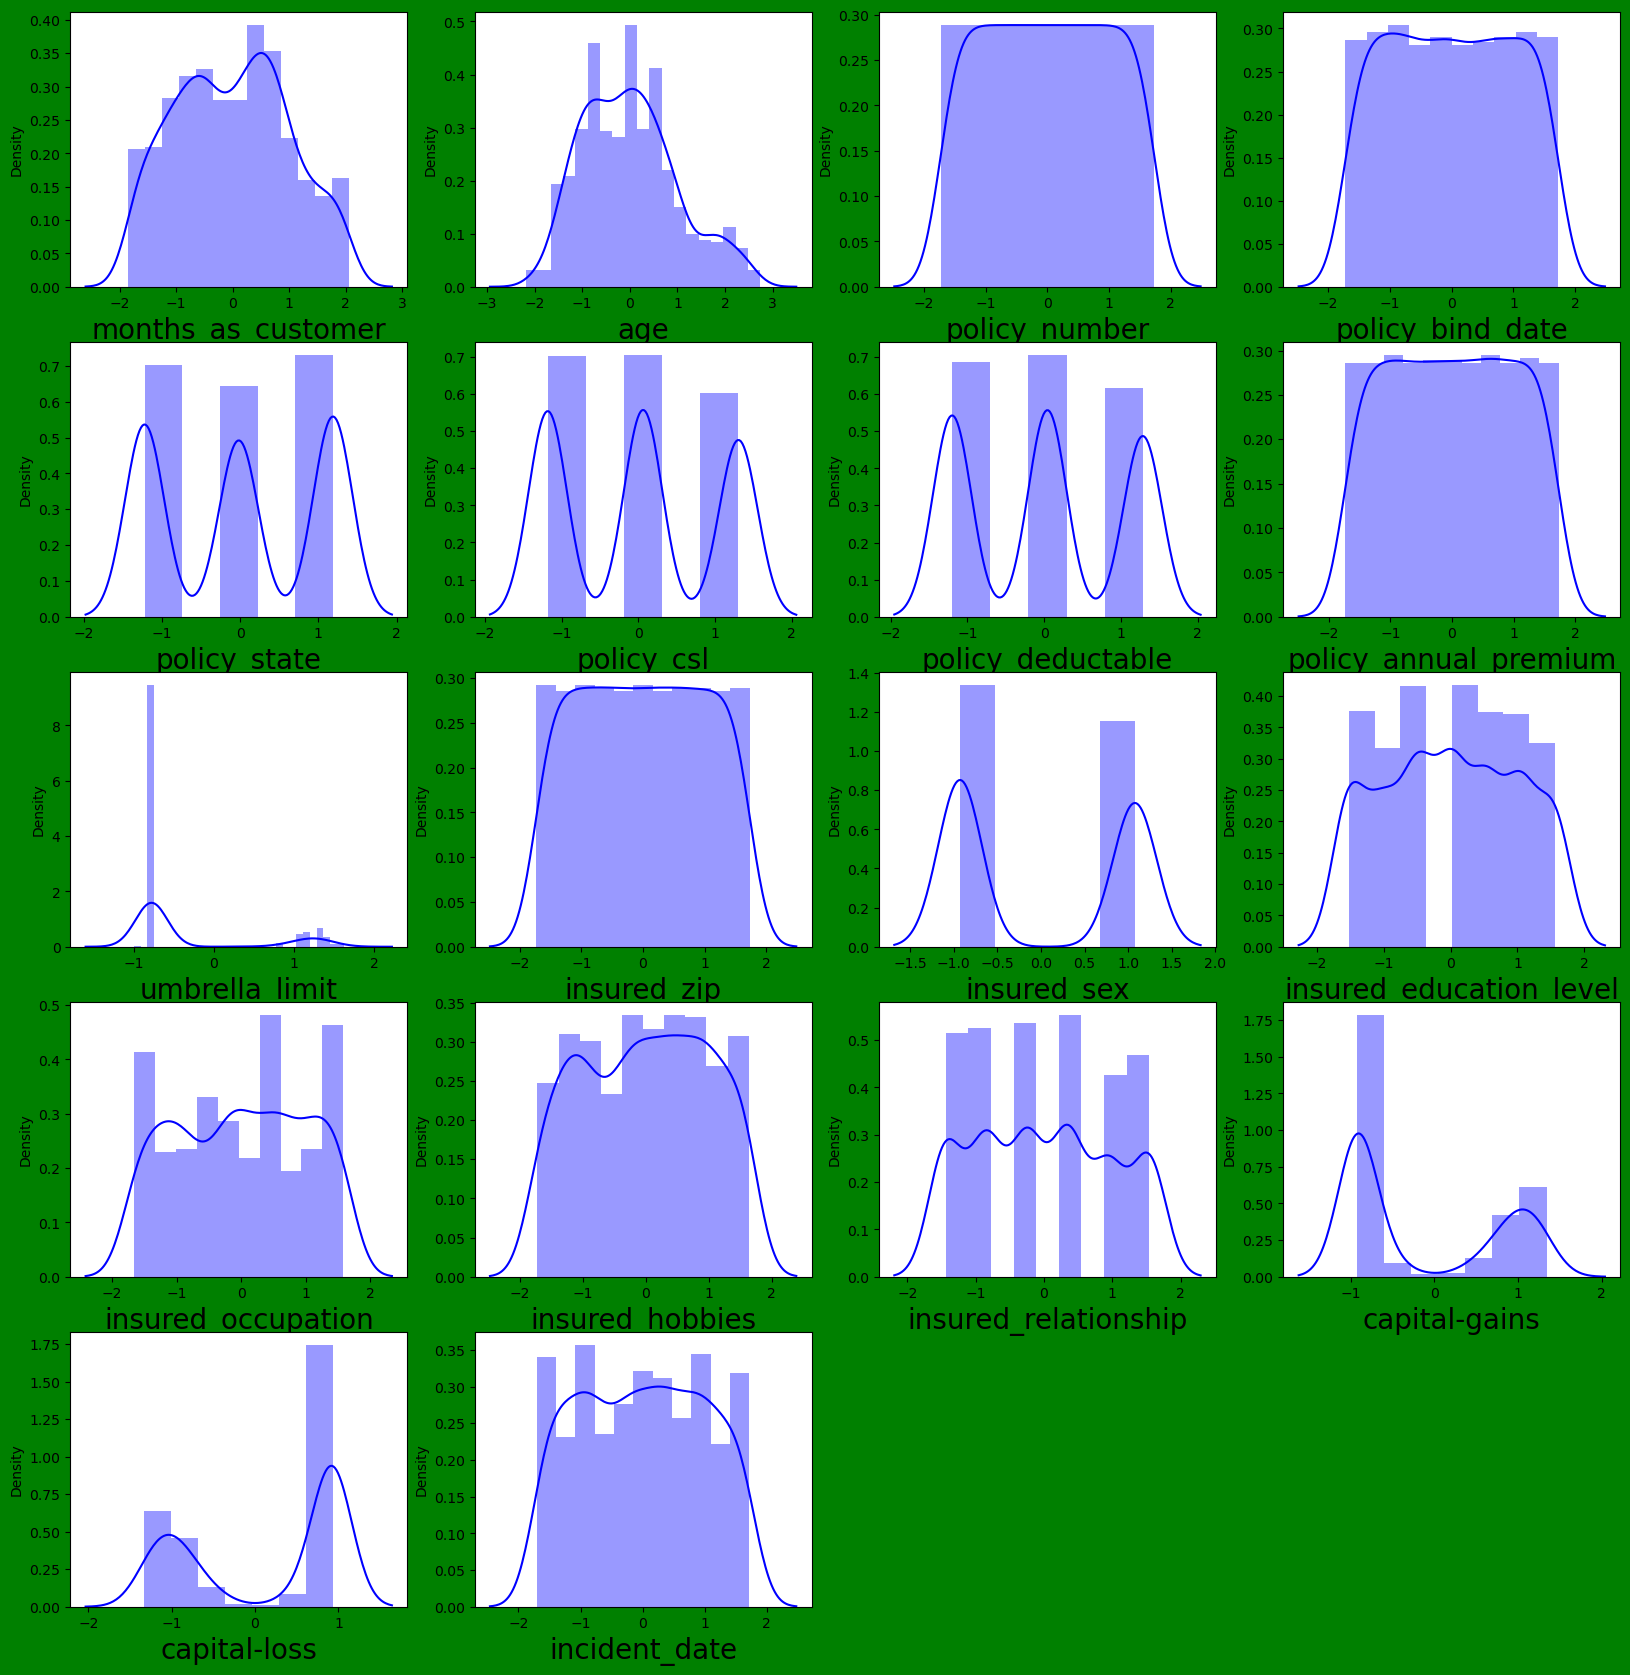

In [148]:
plt.figure(figsize=(20,25), facecolor="green")
plotnumber = 1
for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column], color ='b')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Example pipeline handling unknown categories
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
                    'insured_occupation', 'insured_hobbies', 'insured_relationship',
                    'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted',
                    'incident_state', 'incident_city', 'incident_location', 'auto_make', 'auto_model']




In [ ]:
# SimpleImputer to handle unknown categories
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_cols),
    # Add other transformers for numerical data if needed
])



In [ ]:
# Fit and transform on training data
X_train_prep = preprocessor.fit_transform(X_train)

# Transform test data
X_test_prep = preprocessor.transform(X_test)

Modifying our preprocessing pipeline to include a step that handles diff categories by assigning them a default value.

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Example: Initialize and train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_prep, y_train)


RandomForestClassifier()

In [135]:
y_pred = model.predict(X_test_prep)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")


Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.95      0.85       128
           Y       0.73      0.35      0.48        54

    accuracy                           0.77       182
   macro avg       0.75      0.65      0.66       182
weighted avg       0.76      0.77      0.74       182



In [139]:
from sklearn.linear_model import LogisticRegression

# Example: Initialize and train a RandomForestClassifier
model = LogisticRegression()
model.fit(X_train_prep, y_train)

LogisticRegression()

In [140]:
y_pred = model.predict(X_test_prep)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")


Accuracy: 0.7912087912087912
Classification Report:
              precision    recall  f1-score   support

           N       0.83      0.88      0.86       128
           Y       0.67      0.57      0.62        54

    accuracy                           0.79       182
   macro avg       0.75      0.73      0.74       182
weighted avg       0.78      0.79      0.79       182



So our model is perfroming well with the accuracy score of 79%.